# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data["income"] == ">50K"])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data["income"] == "<=50K"])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k / n_records * 100,2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: ~{}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: ~24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

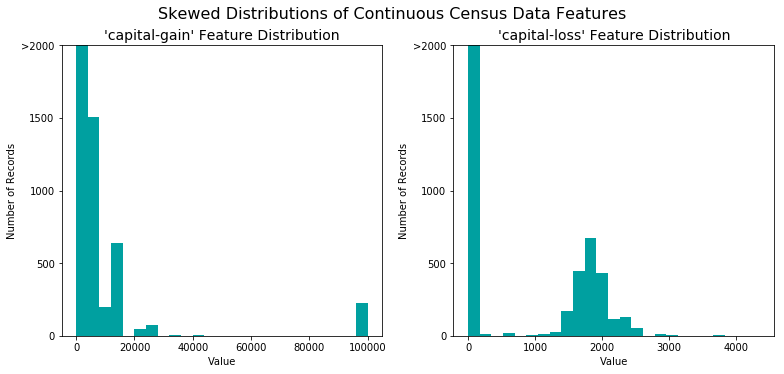

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

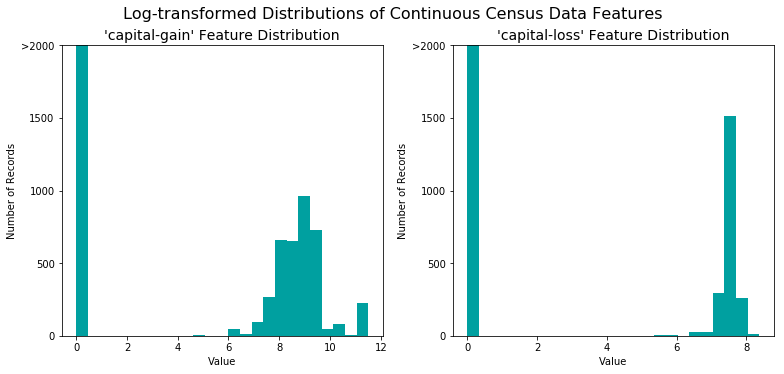

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
from sklearn.preprocessing import label_binarize

# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)
# replace annoying whitespaces between col name and its feature suffix
features_final.columns = features_final.columns.str.replace(" ", "")

# TODO: Encode the 'income_raw' data to numerical values
income = label_binarize(income_raw, classes=["<=50K",">50K"])
income = pd.Series(income.reshape(-1,))

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_level_10th', 'education_level_11th', 'education_level_12th', 'education_level_1st-4th', 'education_level_5th-6th', 'education_level_7th-8th', 'education_level_9th', 'education_level_Assoc-acdm', 'education_level_Assoc-voc', 'education_level_Bachelors', 'education_level_Doctorate', 'education_level_HS-grad', 'education_level_Masters', 'education_level_Preschool', 'education_level_Prof-school', 'education_level_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [8]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

#### Further Exploratory Data Analysis with Seaborn and Pandas
The following section comprises of a short exploratory data analysis of the dataset with pandas and seaborn. Mainly, I will compute the correlation between the continuous and categorical features separately (with **pearson's correlation coefficient** and **Cramers corrected V**, respectively) in order to decide which supervised learning technique could be appropriate for the given data set. For example, an algorithm which would assume the independence of features will not be suitable for the given problem, if the features are highly correlated. Furthermore, the data visualization will help the analyst (me) and customer to understand important properties of the data set, for instance the distribution of certain classes (e.g. skewed / imbalanced classes).

**sources**:
- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
- https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

In [9]:
import seaborn as sns

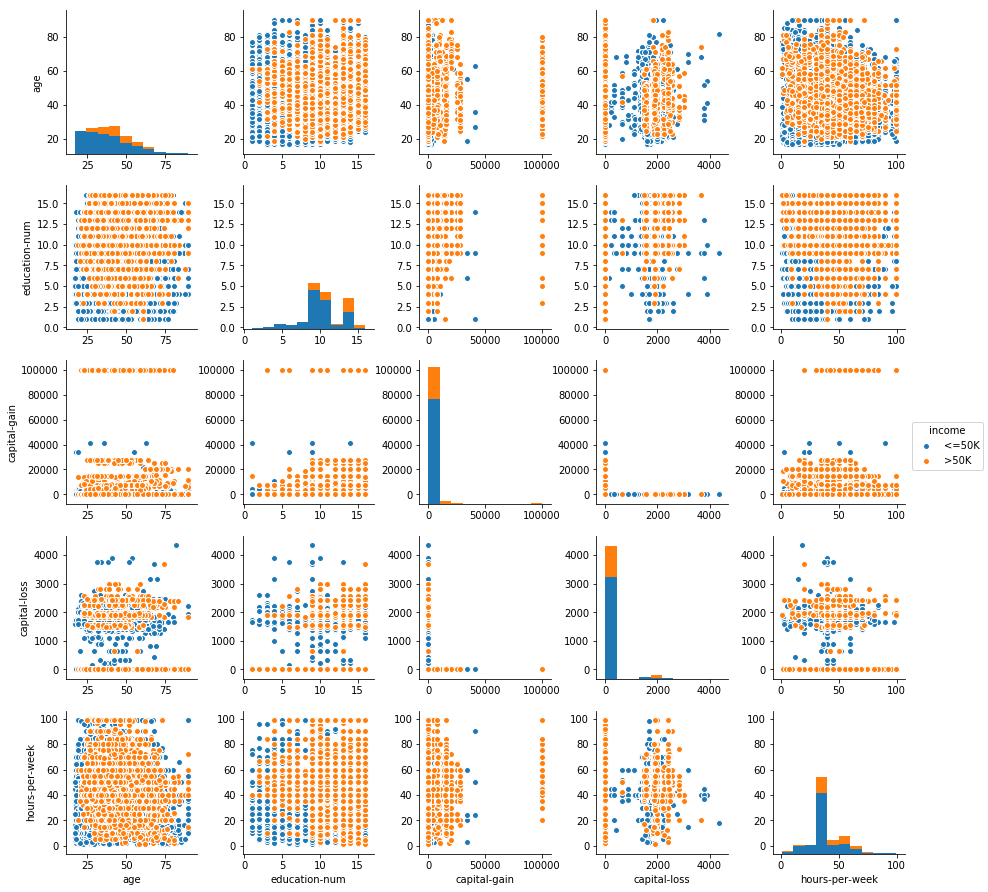

In [10]:
sns.pairplot(data,hue="income")

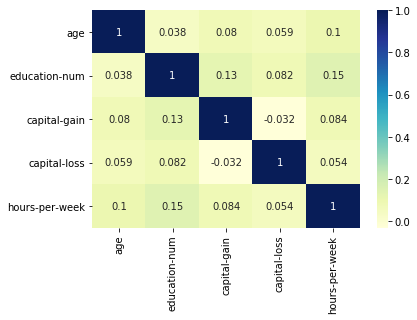

In [11]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028E27F6CD30>,
      dtype=object)

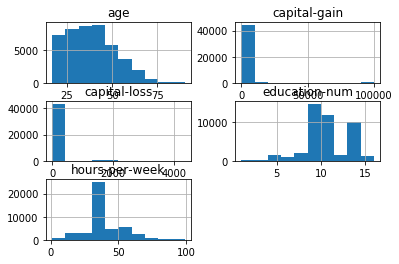

In [12]:
data.hist()

In [13]:
pd.crosstab(data["workclass"], data["workclass"])

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
workclass,,,,,,,
Federal-gov,1406,0,0,0,0,0,0
Local-gov,0,3100,0,0,0,0,0
Private,0,0,33307,0,0,0,0
Self-emp-inc,0,0,0,1646,0,0,0
Self-emp-not-inc,0,0,0,0,3796,0,0
State-gov,0,0,0,0,0,1946,0
Without-pay,0,0,0,0,0,0,21


In [14]:
import scipy
# using cramer's corrected v measurement to determine correlation between categorical variables
# sources:
# https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [15]:
from itertools import combinations
categorical_features = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# create combination list of all categorical features
combs = list(combinations(categorical_features,2))

# calculate metric for each feature pair
for c1,c2 in combs:
    confusion_matrix = pd.crosstab(data[c1], data[c2])
    cramers_corrected_v = cramers_corrected_stat(confusion_matrix)
    print("Cramers corrected V for '{}' and '{}': {}".format(c1,c2,cramers_corrected_v))
    

Cramers corrected V for 'workclass' and 'education_level': 0.10820037850597394
Cramers corrected V for 'workclass' and 'marital-status': 0.07656566393131237
Cramers corrected V for 'workclass' and 'occupation': 0.21628854192707136
Cramers corrected V for 'workclass' and 'relationship': 0.08791147519917208
Cramers corrected V for 'workclass' and 'race': 0.05852045429115904
Cramers corrected V for 'workclass' and 'sex': 0.14348670960730697
Cramers corrected V for 'workclass' and 'native-country': 0.038668236639922096
Cramers corrected V for 'education_level' and 'marital-status': 0.08358997210268916
Cramers corrected V for 'education_level' and 'occupation': 0.19586519511682104
Cramers corrected V for 'education_level' and 'relationship': 0.11577807867999415
Cramers corrected V for 'education_level' and 'race': 0.0706569413584592
Cramers corrected V for 'education_level' and 'sex': 0.08719954626641958
Cramers corrected V for 'education_level' and 'native-country': 0.13109369910859764
Cra

In [16]:
# check data distribution of categorical variables
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']


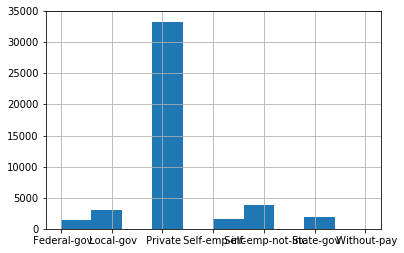

In [17]:
data["workclass"].hist()
print(pd.unique(sorted(data["workclass"])))

[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']


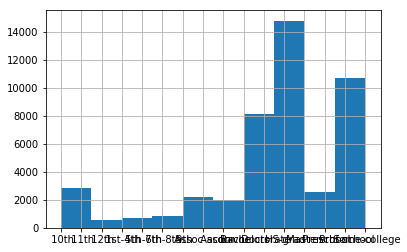

In [18]:
data["education_level"].hist()
print(pd.unique(sorted(data["education_level"])))

[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']


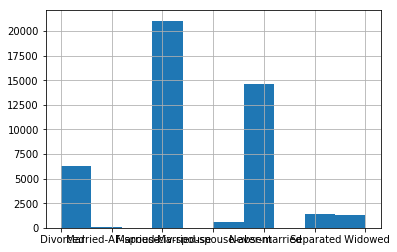

In [19]:
data["marital-status"].hist()
print(pd.unique(sorted(data["marital-status"])))

[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


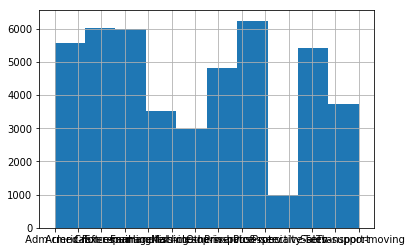

In [20]:
data["occupation"].hist()
print(pd.unique(sorted(data["occupation"])))

[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']


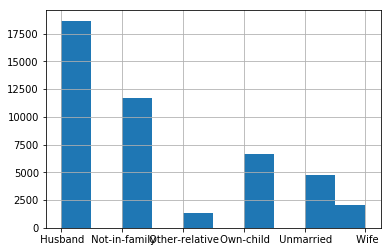

In [21]:
data["relationship"].hist()
print(pd.unique(sorted(data["relationship"])))

[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']


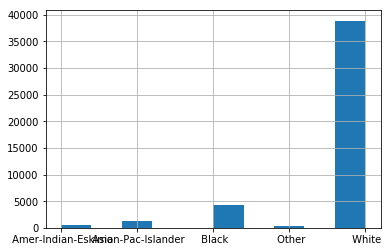

In [22]:
data["race"].hist()
print(pd.unique(sorted(data["race"])))

[' Female' ' Male']


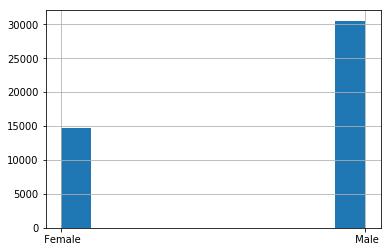

In [23]:
data["sex"].hist()
print(pd.unique(sorted(data["sex"])))

[' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba' ' Dominican-Republic'
 ' Ecuador' ' El-Salvador' ' England' ' France' ' Germany' ' Greece'
 ' Guatemala' ' Haiti' ' Holand-Netherlands' ' Honduras' ' Hong'
 ' Hungary' ' India' ' Iran' ' Ireland' ' Italy' ' Jamaica' ' Japan'
 ' Laos' ' Mexico' ' Nicaragua' ' Outlying-US(Guam-USVI-etc)' ' Peru'
 ' Philippines' ' Poland' ' Portugal' ' Puerto-Rico' ' Scotland' ' South'
 ' Taiwan' ' Thailand' ' Trinadad&Tobago' ' United-States' ' Vietnam'
 ' Yugoslavia']


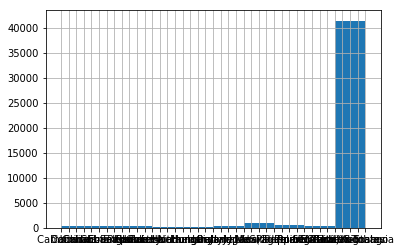

In [24]:
data["native-country"].hist()
print(pd.unique(sorted(data["native-country"])))

#### Results of further Exploratory Data Analysis
The dataset contains some highly correlated features for the categorical variables, whereas most continuous features are only marginally correlated with each other (max_correlation_score <= 0.15). Furthermore, the distribution of the data is highly skewed for many features (categorical and continuous), e.g. 'workclass', 'capital-gain', 'race', 'sex' etc, which will effect the generalization capabilities of the from the data derived classification model. 

The results of the correlation analysis are reported below, values are normalized between 1.0 and -1.0 (1.0=perfect positive correlation, 0.0=no correlation, -1.0=perfect negative correlation) for Pearsons's Correlation Coefficient (PCC), whereas for Cramers Corrected V-Measurement (CCV) the correlation values fall in the range of 1.0 and 0.0.

Used correlation metrics:
- Pearson's Correlation Coefficient (PCC)
- Cramer's Corrected V (CCV)

**continuous**:
Only correlation values above or equal to 0.1 are reported, all other features have a lower correlation coefficient.

|     Feature1   | Feature2          | PCC             |
| :------------: | :---------------: | :-------------: | 
| education-num  | hours-per-week    |   0.15          |
| education-num  | capital-gain      |   0.13          |
| age            | hours-per-week    |   0.10          |


**categorical**:
Only correlation values above or equal to 0.1 are reported, all other features have a lower correlation coefficient. 



|     Feature1   | Feature2          | CCV                  |
| :------------: | :---------------: | :-------------------:| 
| relationship   | sex               | 0.64                 |
| marital-status | relationship      | 0.48                 |
| marital-status | sex               | 0.46                 |
| occupation     | sex               | 0.43                 |
| race           | native-country    | 0.41                 |
| workclass      | occupation        | 0.21                 |
| education_level| occupation        | 0.19                 |
| occupation     | relationship      | 0.17                 |   
| workclass      | sex               | 0.14                 |
| education_level| native-country    | 0.13                 |
| marital-status | occupation        | 0.12                 |
| education_level| relationship      | 0.11                 |
| race           | sex               | 0.11                 |
| workclass      | education_level   | 0.10                 |


### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

#### General
As shown above, the dataset consists of many highly correlated features, e.g. 'relatationship' - 'sex', 'marital-status' - 'relationship' etc.. These highly correlated features are problematic for classification algorithms, that assume feature independence and little or no multicollinearity between features (Logistic Regression, Stochastic Gradient Descent and Naive Bayes). Therefore, these algortihms are not appropriate for the given dataset, as the correlation analysis (cf. above) showed, that this assumption has been likely violated.

Moreover, the Gaussian Naive Bayes Model would also assume, that the continuous feature values are normally distributed, but this seems highly unlikely, as the visualization of the distribution of features like 'capital-gain', 'capital-loss' and 'age' looks highly skewed. As a result, one can assume, that the statistical assumption of normally distributed data is too constrained for the given dataset. As the features comprise of categorical and continous feature, one would also have to create bins for all continuous values, in order to fit two different Naive Bayes models (one for only the categorical and continuous feauture sets, respectively), as Naive Bayes does not work 'out of the box' for data with a mixture of continuous and categorical features.

**sources**
- https://www.statisticssolutions.com/assumptions-of-logistic-regression/
- https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes
- https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea

Due to the reasos discussed above, I will constrain myself to the following three supervised learning algorithms for the given classification problem:

#### Model 1: Support Vector Machine (SVM)
##### Real-world applications
- Face detection
- Text and hypertext classification
- Image classification
- Bioinformatics / biomedical applications
  - Protein & gene classificiation
  - Protein remote homology detection
- Handwriting recognition

**sources**
- https://data-flair.training/blogs/applications-of-svm/
- https://www.ncbi.nlm.nih.gov/pubmed/27294123
- https://www.springer.com/de/book/9783319022994
- http://www.clopinet.com/isabelle/Projects/SVM/applist.html

##### Strengths
- due to only *implicit* non-linear data transformation with kernel function, the data is still linearly separable 
- robustness, even if the data contains some bias
- no assumption of data distribution

**source**
- https://core.ac.uk/download/pdf/6302770.pdf

##### Weaknesses
- does not scale well with larger sample sizes, memory-intensive
- results harder to interpret (e.g. one can not model feature importance)
- relative high number of parameters to tune (e.g. kernel type, C, tolerance etc.)

**sources**
- https://www.researchgate.net/post/What_is_the_computational_complexity_of_an_SVM_training_and_testing_process
- https://www.hackingnote.com/en/machine-learning/algorithms-pros-and-cons

##### Suitability for the problem at hand
SVM could be be an appropriate model for the given dataset, as the dataset size is small enough (~ 45.000 samples), so that the model can be stil trained in a reasonable time despite its time complexity of ~O(n^2). As SVM does not make strong statistical assumptions about the distribution of the data, the model won't be effected much by the skewness present in the data. The algorithm has been used in a variety of complex problems and can model non-linearity in the data with the help of non-linear kernel funtions. As the census-dataset contains a variety of different features, which shall predict the income, it seems justifiable to assume, that the data can be described better in terms of a non-linear than a linear model. This makes SVM an approriate candidate as a ML model, that could be tried on the given data. 


#### Model 2: Random Forest (RF)
##### Real-world application
- Finance Sector
  - Option pricing
  - Trading
  - Risk analyis
    - e.g Detection of financial vulnerability of countries 
- Groundwater nitrate detection on the African continent
- Machine fault diagnosis
- Bioinformatics
  - Analysis of microarray gene expression Data
  - Analysis of mass spectrometry-based proteomics data
  - Genome-wide association study
  - Protein-protein interaction prediction
- Analysis of Social Science data

**sources**
- https://link.springer.com/article/10.1007/s10040-018-1900-5
- https://towardsdatascience.com/example-of-random-forest-application-in-finance-option-pricing-d6ee06356c6e
- https://www.mdpi.com/2071-1050/10/5/1530/pdf
- https://pdfs.semanticscholar.org/048d/bd4acf1c34fc87bee4b67adf965e90acb38c.pdf
- https://link.springer.com/chapter/10.1007/978-1-84628-814-2_82
- http://www.cs.cmu.edu/~qyj/papersA08/11-rfbook.pdf
- http://rosiezou.com/RFPaperDraft.html

##### Strengths
- versatile algorithm for classification and regression problems
- can learn complex non-linear relationships due to ensemble of muliple decision tree
- robustness to outliners
- no assumptions on data distribution
- easy to understand due to calculation of feature importance

**sources**
- https://elitedatascience.com/machine-learning-algorithms
- https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222
- https://www.hackingnote.com/en/machine-learning/algorithms-pros-and-cons

##### Weaknesses
- despite being an ensemble method, can be still prone to overfitting due to high model complexity
- computationally expensive

**sources**
- https://datascience.stackexchange.com/questions/1028/do-random-forest-overfit
- https://www.quora.com/What-is-the-time-complexity-of-a-Random-Forest-both-building-the-model-and-classification

##### Suitability for the problem at hand
Random Forest could be be an appropriate model for the given dataset, as the dataset size is small enough (~ 45.000 samples), so that the model can be stil trained in a reasonable time despite its time complexity of ~O(log(n)). As Random Forest does not make strong statistical assumption about the distribution of the data, the model won't be effected much by the skewness present in the data. The algorithm has been used in a variety of complex problems and can model complex non-linear functions. As the census-dataset contains a variety of different features, which shall predict the income, it seems justifiable to assume, that the data can be described better in terms of a non-linear than a linear model. Moreover, the ensemble of multiple 'weak' decision tree learners, trained on a subset of the features and data, addresses the problem of overfitting compared to using a single decision tree for training. The results of the model can be also interpreted more easily - compared to other ML algorithms (Neuronal Networks, SVM etc.) -, as Decision Trees are able to determine the importance of each feature for predicting the outcome y. This is especially helpul for a better understanding of the learning process and communicating the final results to the charity-ml customer. 

#### Model 3: K-Nearest Neighbors (KNN)
##### real-world application
- Search Applications
- Recommender Systems
- Computer Vision
  - Feature Extraction
  - Fingerprint Detection
- Medical Data Mining

**sources**
- https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm
- http://www.hertasecurity.com/en/
- https://www.researchgate.net/publication/270163293_Application_of_k-Nearest_Neighbour_Classification_in_Medical_Data_Mining
- https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

##### strengths
- low number of parameters, that need to be tuned
- can used flexible for regression and classification problems

**sources**
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

##### weaknesses
- complexity high, slow when used on larger sample sizes
  - though this weakness can be adressed partly by using more efficient tree structures that reduce the number of distance calculations (compared to a brute-force approach), e.g. KD- or Ball Trees 

**sources**
- https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
- https://scikit-learn.org/stable/modules/neighbors.html

##### Suitability for the problem at hand
KNN also does not make any assumptions about the data distribution, the data does only have to be present in some feature space with some notion of distance. The dataset is reasonably small, so that KNN's discrepancies with respect to time complexity (when using brute-force) won't effect the training time as much as with larger sample sizes. The algorithm is rather simple and thr notion of neighbours makes the results easily interpretable. Moreover, the number of parameters, that need to be tuned, is much smaller compared to other ML models (e.g. Random Forest and SVM), so that finding an optimal model for the given data is much simpler, as a lower number and smaller range of hyperparameters have to be tested.  

**sources**
- https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [25]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

d:\users\mvogel\pycharmprojects\dsnd_term1\projects\p1_charityml\venv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


d:\users\mvogel\pycharmprojects\dsnd_term1\projects\p1_charityml\venv\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


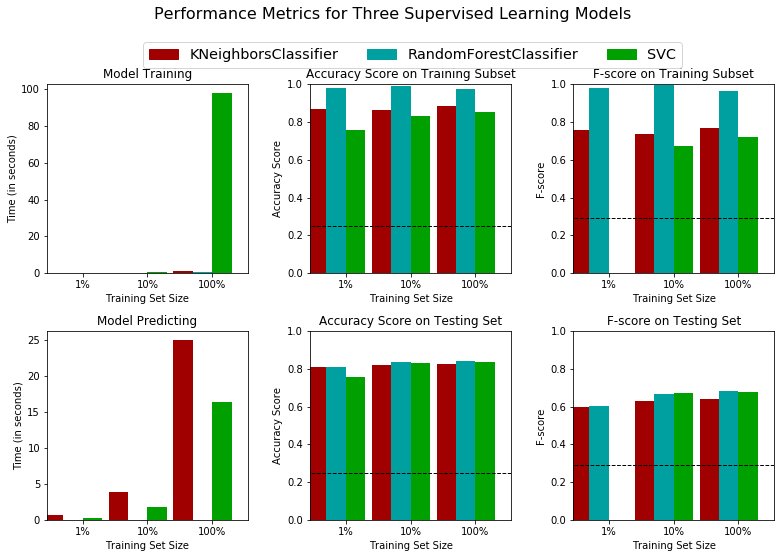

In [26]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

random_state = 42

# TODO: Initialize the three models
# note: knn enables random_state, but when using
# the default params the kdree with brute force
# throws an exception
# (no random state allowed when using this method, because it's deterministic)
clf_A = KNeighborsClassifier()
clf_B = RandomForestClassifier(random_state=random_state)
clf_C = SVC(random_state=random_state)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

With regards to the evaluation results of the models (with default prameters), Random Forest clearly outperforms SVM and KNN in training and prediction time. The model's train **accuracy (~97%**) and **F1-Score (~96%)** are also significantly higher than the scores for the SVM and KNN model. Although the differences between the models' test accuracy and F1-Score aren't as large as in the train scores, the Random Forest model still performs better than SVC and KNN. As the Random Forest is the best model with respect to all given evaluation metrics, it will be choosen for further model optimization.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

In order to predict, whether a person earn more than 50k a year, the Random Forest Algorithm has been used. The base building block of this algorithm are so called Decision Trees. A Decision Tree essentially tries to split up the the given data by asking a set of yes/no questions about it, e.g. "Is the person male?", "Does the person work in private sector?" "Is the person's capital gain above x$ per year?" etc.. By splitting up the data according to these questions, a hierachically ordered tree is created. 
To determine good questions and their order for a split, the features of the dataset are considered. The relevance of a given feature with respect to the data is determined by calculating the feature's importance for predicting the data at each given split. With the help of specific Splitting-Algorithms (e.g. CART) one can decide the overall importance of each feature for predicting the income.

One Decision Tree can already achieve a high accuracy in a wide range of Machine Learning problems. However, a single Decision tree tends to memorize the (training) data, as the algorithm allows us to model any complex function that would model our data (nearly) perfectly. Unfortunately, such a model would only work on this specific data and would perform significantly worse on any unseen data (Overfitting). To adress this problem, we can use not only one, but multiple Decision Trees when building our final model.  Each of these trees is then only trained on a random subsample of the data and can only use a a randomly chosen set of features to determine its split for this subset of data. Although each model alone is not as accuarate as a model trained on the whole data and feature set, the combination of all models allows us to adress the problem of overfitting. In order to predict new data, the predictions of all single Decision Tree models are considered by averaging their predictions to determine the final answer. This combination of multiple Decision Trees is callled Random Forest.


**sources**
- https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
- https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [27]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=random_state)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {"max_depth": [2,4,8,16,32],
              "n_estimators": [100, 200, 300, 400, 500],
              "min_samples_split": [2,4,8,16,32],
              "min_samples_leaf": [2,4,8,16,32],
              "bootstrap": [True],
              "criterion": ["entropy"]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer, n_jobs=-1, verbose=2)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Fitting 3 folds for each of 625 candidates, totalling 1875 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 1875 out of 1875 | elapsed: 71.2min finished


Unoptimized model
------
Accuracy score on testing data: 0.8431
F-score on testing data: 0.6842

Optimized Model
------
Final accuracy score on the testing data: 0.8590
Final F-score on the testing data: 0.7321


In [28]:
best_clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)>

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |     0.8431        |   0.8590        |
| F-score        |     0.6842        |   0.7321        | 


**Answer: **

The optimized model performs significantly better than the unoptimized model.

The test accuracy increased by small margin from 84.31% to 85.90% (**+1.59**).

The test F1-score increased noticeably from 68.42% to 73.21 % (**+4.79%**).

The Random Forest model clearly outperforms the naive classification model:

|     Metric     | Naive Predictor   | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |     0.2478        |   0.8590        |
| F-score        |     0.2917        |   0.7321        |


Accuracy gain (naive - optimized): **+61.12%**

F1-Score gain (naive - optimized): **+44.04%**


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**
1. capital gain 
2. occupation
3. education num
4. age
5. sex

The feature capital gain seems to have the biggest impact on a person's overall income, as one can already have an income above 50k/year if the capital gain is high enough (e.g. 50k+), even if no other features would be considered. Moreover, it is reasonable to assume that a person's choice of occupation will also highly influence his/her income due to the wage differences in different sectors (e.g. technical vs. social jobs). After these features I would rank "education num" as the third important feature due to the fact that a person's investment in his/her education (e.g. by attending college) usually pays off with respect to their later income. A college degree ususally enables a person access to more high-paying jobs than lower educational degrees (e.g. a high school diploma). The age of a person might also effect his/her overall income positively, because a person's salary usually increases proportionally to their time in a specific company, which is (partially / indireclty) reflected by the feature "age". With respect to the (controversial) political discussion about a gender pay gap between men and women in the workforce, one could also assume that the feature "sex" might be informative to predict a person's income, although this difference in women's wages might not necessarily be reflected in their overall income: Factors like shared finances between spouses in a marriage could "balance out" this discrepancy when only regarding a person's overall income. Despite this fact, I would still consider the feature "sex" to be relevant when predicting a person's income. 


**sources**
- https://budgetmodel.wharton.upenn.edu/issues/2016/2/22/education-and-income-growth
- https://en.wikipedia.org/wiki/Gender_pay_gap

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

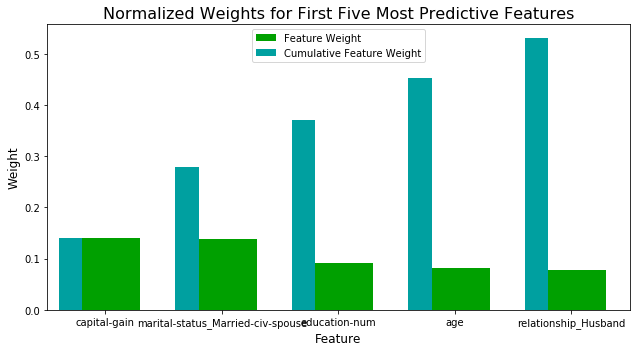

In [29]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = best_clf.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

|  feature rank  |      predicted    |      actual                              |
| :------------: | :---------------: | :--------------------------------------: |  
|        1       |     capital gain  |   capital gain                           |
|        2       |     occupation    |   martial-status_Married-civ-spouse      |  
|        3       |     education num |   education num                          |
|        4       |     age           |   age                                    | 
|        5       |     sex           |   relationship_Husband                   |

My estimations for the relevance of the features "capital gain", "education num" and "age" are confirmed by the visualization of the normalized feauture weights, as they correspond to the first, third and fourth feature weight bar in the figure. Surprisingly (for me), a person's choice of occupation does not seem to influence their overall income more than other given features in the dataset. Instead, his/her marital-status seems to be more informative for predicting his/her income. An income difference between the genders could also not be verified in the dataset, as the relationship status (Husband) is more informative for predicting a person's income than his/her sex. One explanation why a person's marital and relationship status is relevant for predicting his/her income could be the fact that richer couples tend do marry more than poorer ones. An CBS News article from 2017 states: "About 50 percent of Americans with high school degrees are now married, down from 63 percent in 1990. By comparison, 65 percent of college-educated adults are married, down only 4 percentage points over the same period" (cf. sources).

**sources**
- https://www.cbsnews.com/news/who-gets-married-today-the-rich-and-educated/

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [30]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8590
F-score on testing data: 0.7321

Final Model trained on reduced data
------
Accuracy on testing data: 0.8446
F-score on testing data: 0.6913


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**
When comparing the final model's F- and accuracy score on the reduced data using only five feature with the model's scores that has been trained on all features there is only a marginally difference in the models' performance: The accuracy score for the model with all features differs only roughly 1.5% from the score for the reduced model, whereas the difference with respect to the F sorce is only ~4%. If training time was a factor, these small differences could be neglected as even a reduced model is able to predict a person's income rather accurately. With such a reduced feature space one could more easily train a model for much larger dataset than the one give in this exercise.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.